In [ ]:
#K-Nearest Neighbors

# The k-nearest neighbors (KNN) algorithm is a data classification method
#for estimating the likelihood that a data point will become a member of one group, or another based on what group
#the data points nearest to it belong to.






In [17]:
# • Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#• Importing the Dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)
dataset.head()
dataset["Class"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Class, dtype: int64

In [11]:
#• Split our dataset into its attributes and labels. To do so, use the following code:

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values

In [7]:
#• Create training and test splits:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

#• The final step is to make predictions on our test data:
y_pred = classifier.predict(X_test)

In [21]:
# Evaluating the Algorithm

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Text(0, 0.5, 'Mean Error')

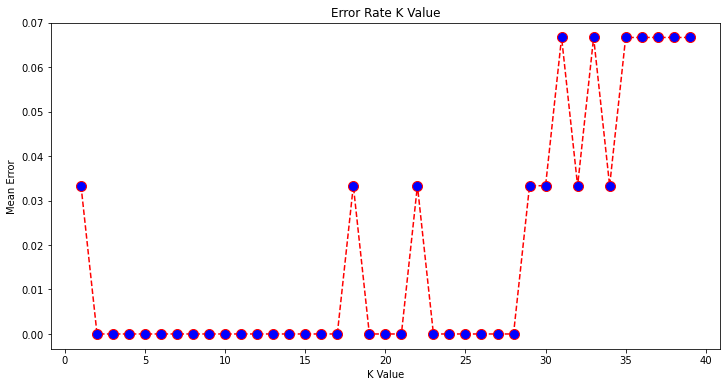

In [24]:
# Comparing Error Rate with the K Value

#One way to help you find the best value of K is to plot the graph of K value and the corresponding
#error rate for the dataset.
#• Plot the mean error for the predicted values of test set for all the K values between 1 and 40:

error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed',
marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
